In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.linear_model

In [2]:
 df = pd.read_csv("/Users/abhishektiwari/Desktop/hands-on-machine-learning-scikit-learn-tensorflow-oreilly-geron/datasets/housing/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.ocean_proximity.value_counts()  #No of properties of each kind in the dataset 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

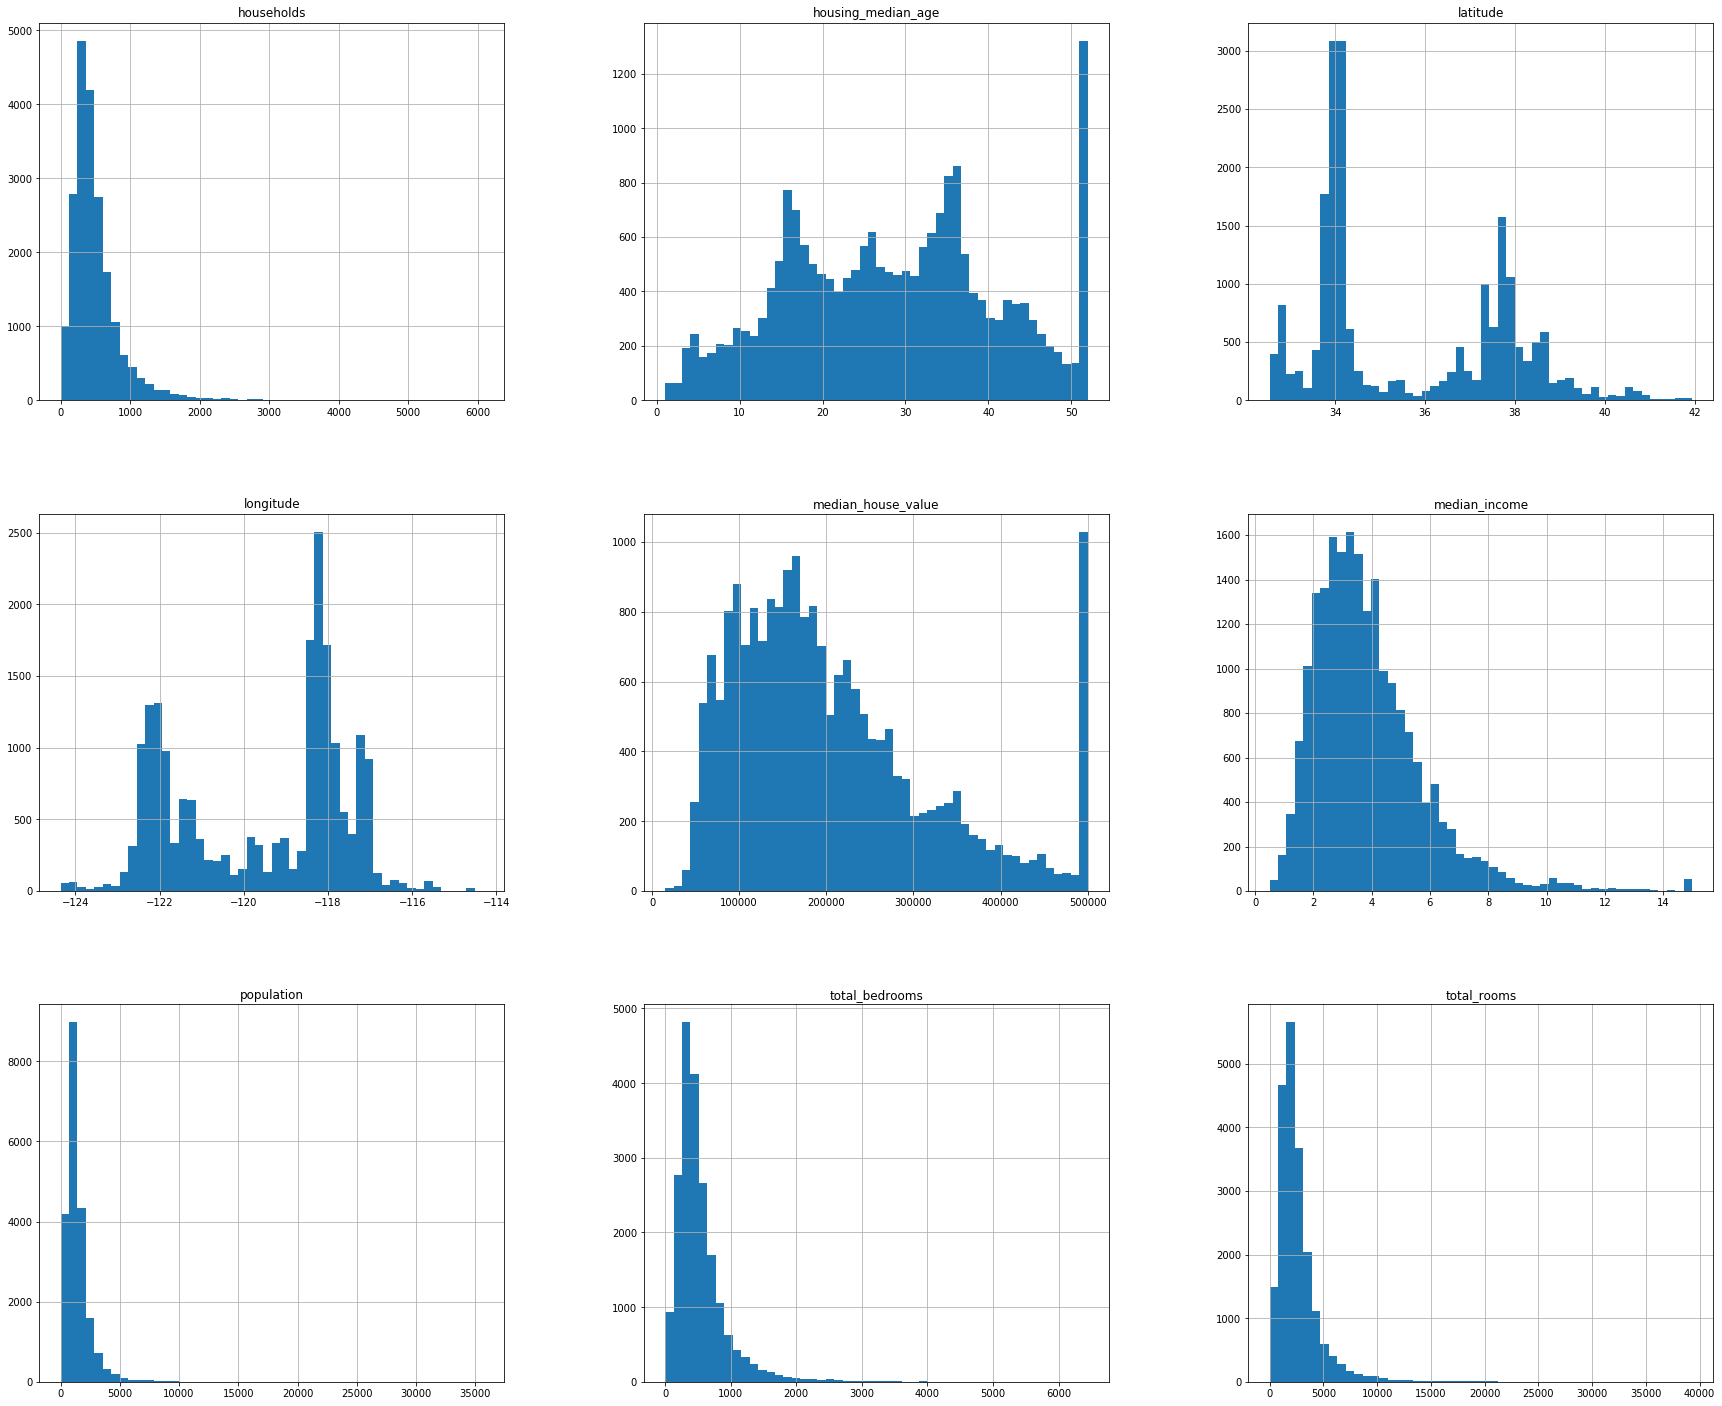

In [6]:
#Histogram of variable 
df.hist(bins=50, figsize=(30,25))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
df['income_category'] = pd.cut(df['median_income'], bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1,2,3,4,5])

In [9]:
df.income_category

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_category, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

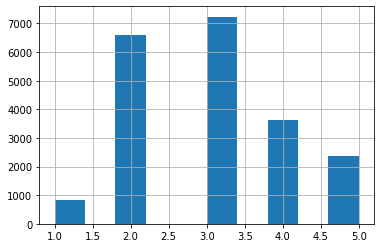

In [10]:
df.income_category.hist()
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
#Making a stratified split so that the train and the test sets are representative of the dataset
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [12]:
for train, test in split.split(df, df.income_category):
    strat_train_set = df.loc[train] 
    strat_test_set = df.loc[test]


In [13]:
strat_test_set.income_category.value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [14]:
#Dropping the income category column so that the dataset is back to original 
strat_test_set.drop("income_category", axis = 1, inplace = True)
strat_train_set.drop("income_category", axis = 1, inplace = True)

In [57]:
# strat_test_set
housing = strat_train_set
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


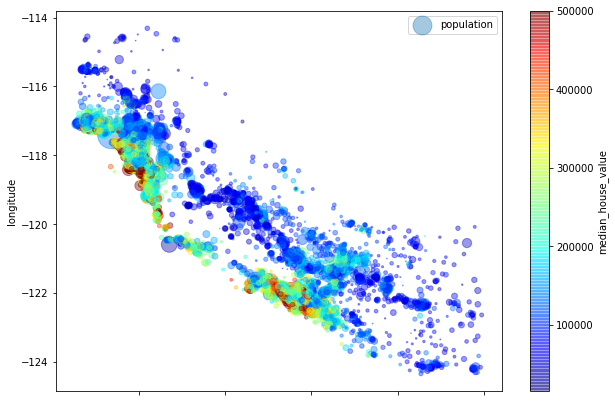

In [60]:
housing.plot(kind = 'scatter', x = 'latitude', y = 'longitude', s = housing['population']/50, alpha = 0.4, label = 'population', c = 'median_house_value', cmap = plt.get_cmap("jet"), colorbar = True, figsize = (10,7))

In [61]:
corr_matrix = housing.corr()

In [62]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a206a6b90>,
      dtype=object)

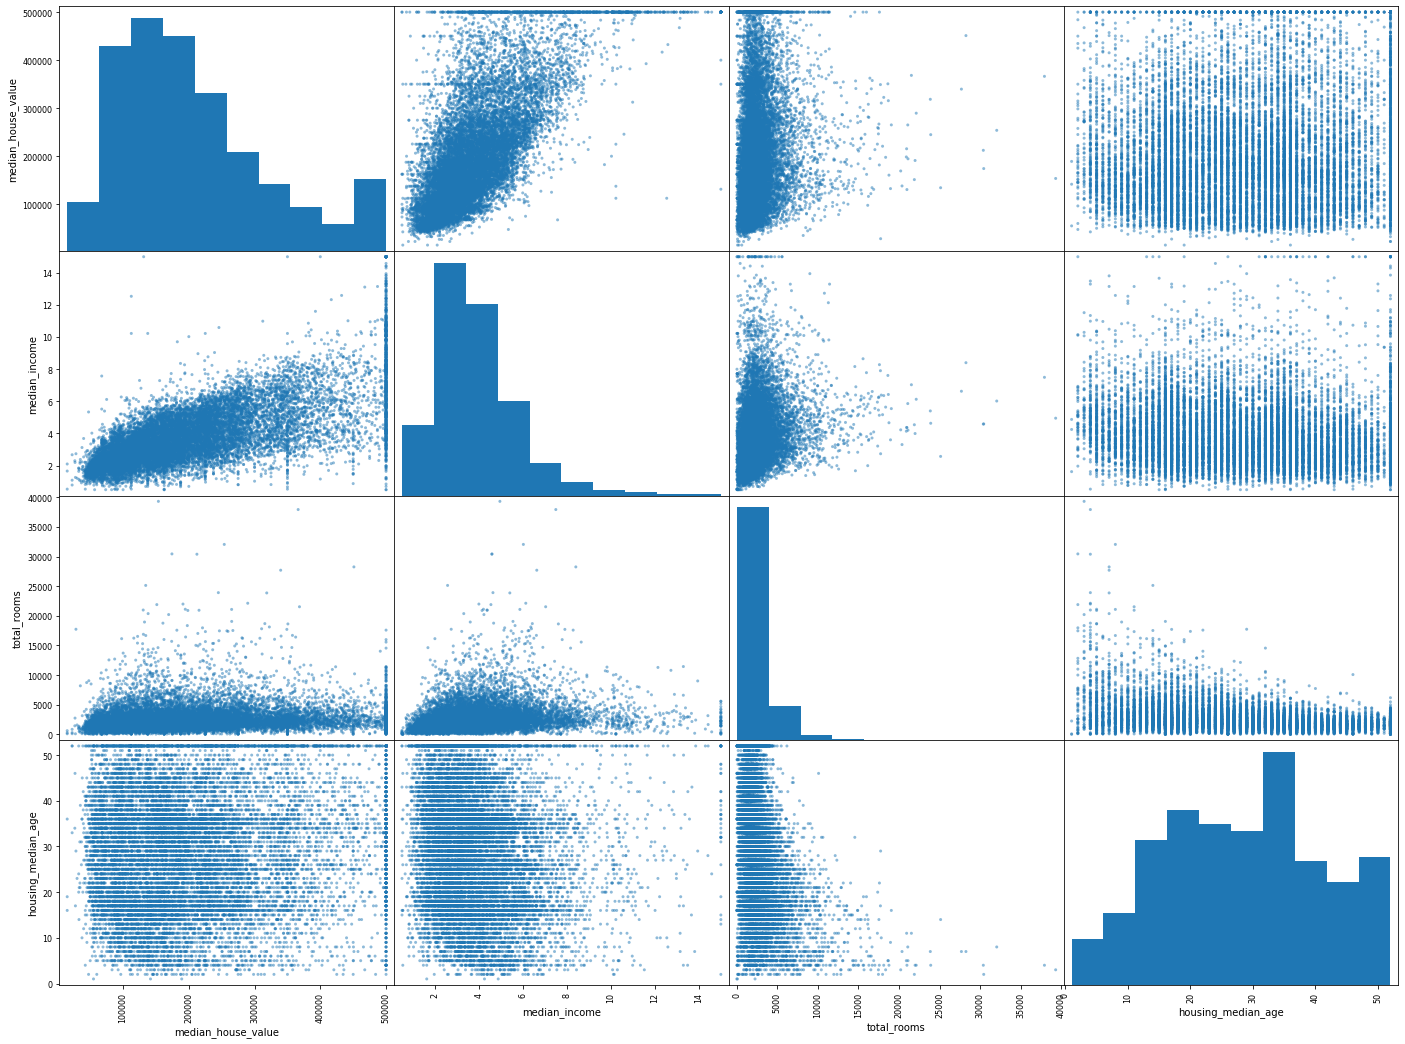

In [64]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(24, 18))

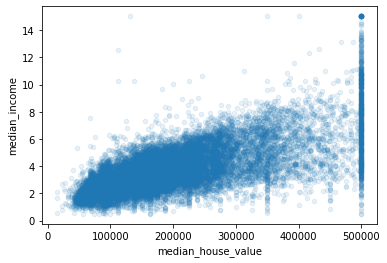

In [20]:
housing.plot(kind="scatter", y="median_income", x="median_house_value", alpha=0.1)

In [21]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [23]:
#Dropping median house value as we are predicting it 
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_label = strat_train_set.median_house_value.copy()

In [24]:
#imputing the missing values of the total bedroom columns with the median
median = housing["total_bedrooms"].median() 
housing["total_bedrooms"].fillna(median, inplace=True)

In [25]:
#using the sklearn imputer to do the same 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [26]:
#Returns the median of all the variables in the dataset
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [27]:
X = imputer.transform(housing_num) #imputes the value in the dataset, returns a numpy array 

In [28]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)#Converting the numpy array to a pandas dataframe 

In [29]:
housing_tr.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [30]:
housing_cat = housing[['ocean_proximity']] #sepaarting the categorical variable 

In [31]:
#Creating a custom transformstion 
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 #Indexes of ther respective columns 


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #bedrooms_per_room is set to true by default
        self.add_bedrooms_per_room = add_bedrooms_per_room 
        
    def fit(self, X, y=None):
        return self # nothing else to do 
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] #divides total rooms by total number of households
        population_per_household = X[:, population_ix] / X[:, households_ix] #divides population by total number of households
        if self.add_bedrooms_per_room:  #if bedrooms_per_room is set to be true 
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] #calculates the bedrooms per room 
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room] #appends it as a value to the numpy ndarray
        else:
            return np.c_[X, rooms_per_household, population_per_household] #returns the array without adding the bedrooms_per_room
        
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) 
housing_extra_attribs = attr_adder.transform(housing.values) #dataframe is passed as an ndarray 

In [32]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 

In [65]:
#Creating a pipeline to streamline the tasks 
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')), #Imputing the missing values with respective medians 
                         ('attributes_adder', CombinedAttributesAdder()), #Adding the attributes
                         ('Standard_scaler', StandardScaler())]) #Z-scaling the entire dataframe 

In [34]:
housing_num_tr = num_pipeline.fit_transform(housing_num) #Passing the data through the pipeline 

In [35]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

'''Separating the numerical and categorical attributes'''

num_attribs = list(housing_num) #getting a list of all the numeric attributes 
categorical_attribs = ['ocean_proximity'] #Getting the categorical variable 
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs), ('cat', OneHotEncoder(),categorical_attribs)]) #passing the numerical variables throught the numerical pipeline and categorical variables through the categorical pipeline

In [37]:
prepared_housing = full_pipeline.fit_transform(housing) #Passing the entire dataset through the entire pipleine and transforming it 

In [66]:
from sklearn.linear_model import LinearRegression 

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(prepared_housing, housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]
some_prepared_data = full_pipeline.transform(some_data)
print('predictions: ', lin_reg.predict(some_prepared_data))
print('actual: ', some_labels)

predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
actual:  17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


/Users/abhishektiwari/opt/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:439: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [76]:
#Checking the errors in the predicitons, by comparing them to the actual labels 
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(prepared_housing)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68628.19819848922


In [78]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_housing, housing_label)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [79]:
housing_predictions = tree_reg.predict(prepared_housing)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.0


In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, prepared_housing, housing_label, scoring="neg_mean_squared_error", cv= 10)
tree_rmse = np.sqrt(-scores)
print(tree_rmse)
print(tree_rmse.mean())
print(tree_rmse.std())

[68890.40614713 65600.38138008 70555.68097201 69435.33601752
 70322.65567161 74786.90984061 70798.58977175 71341.54403765
 75937.63584055 69367.57152799]
70703.67112069043
2781.645600972751


In [83]:
scores = cross_val_score(lin_reg, prepared_housing, housing_label, scoring="neg_mean_squared_error", cv= 10)
tree_rmse = np.sqrt(-scores)
print(tree_rmse)
print(tree_rmse.mean())
print(tree_rmse.std())

[66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
69052.46136345083
2731.6740017983443


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
param_grid = [
    {'n_estimators': [3,6,9,12,15], 'max_features': [2,4,6,8]},
    {'n_estimators': [3,6,9,12,15], 'max_features': [2,4,8], 'bootstrap': [False]},
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score = True, verbose = True)
grid_search.fit(prepared_housing, housing_label)



Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [89]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 15}

In [90]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [91]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [92]:
print(final_rmse)

48847.89637565555


In [93]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2 
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([46749.44002699, 50859.84484656])